In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unsw-train/Test_Data (1).csv
/kaggle/input/unsw-train/Train_Data (1).csv
/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv
/kaggle/input/unsw-nb15/UNSW-NB15_1.csv
/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv
/kaggle/input/unsw-nb15/UNSW-NB15_LIST_EVENTS.csv
/kaggle/input/unsw-nb15/UNSW-NB15_4.csv
/kaggle/input/unsw-nb15/UNSW-NB15_3.csv
/kaggle/input/unsw-nb15/UNSW-NB15_2.csv
/kaggle/input/unsw-nb15/NUSW-NB15_features.csv


# What is IDS (Intrusion Detection System)?
Intrusion Detection Systems (IDS) are precisely present to prevent attacks and infiltration to Networks, which might affect the organization. They monitor network traffic for suspicious activities and issue alert in case of issues.

### Types if IDS:

* Signature-based intrusion detection– In this kind incoming attacks are compared with pre-existing database of known attacks.
* Anomaly-based intrusion detection- It uses statistics to form a baseline usage of the networks at different time intervals. They were introduced to detect unknown attacks.
#### Based on where they discover, they can be classified into:
* Network intrusion detection (NIDS)
* Host intrusion detection (HIDS)

# Problem Statement
With the rise of Internet usage, it is very important to protect Networks. The most common risk to a network’s security is an intrusion such as brute force, denial of service or even an infiltration from within a network. With the changing patterns in network behavior, it is necessary to switch to a dynamic approach to detect and prevent such intrusions.





# UNSW-NB15: Data cleaning and preprocessing
## Importing libraries

In [ ]:
import numpy as np  # for array
import pandas as pd  # for csv files and dataframe
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # plotting
from scipy import stats

# Reading data

In [ ]:
all_data=pd.read_csv("/kaggle/input/unsw-train/Train_Data (1).csv")

In [ ]:
all_data.replace("[nan]",'',inplace=True)

In [ ]:
all_data.isnull().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
land                      0
wrongfragment             0
urgent                    0
hot                       0
numfailedlogins           0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
numoutboundcmds           0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportra

In [ ]:
all_data.shape

(86845, 43)

In [ ]:
all_data

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack
0,0,tcp,netbios_dgm,REJ,0,0,0,0,0,0,...,0.06,0.06,0.00,0.00,0.00,0.00,1.00,1.00,21,1
1,0,tcp,smtp,SF,1239,400,0,0,0,0,...,0.45,0.04,0.00,0.00,0.11,0.00,0.02,0.00,18,0
2,0,tcp,http,SF,222,945,0,0,0,0,...,1.00,0.00,0.02,0.03,0.00,0.00,0.00,0.00,21,0
3,0,tcp,http,SF,235,1380,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,0
4,0,tcp,uucp_path,REJ,0,0,0,0,0,0,...,0.01,0.08,0.00,0.00,0.00,0.00,1.00,1.00,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86840,0,tcp,http,SF,216,674,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.01,0.00,0.00,21,0
86841,0,tcp,http,SF,368,1725,0,0,0,0,...,1.00,0.00,0.03,0.05,0.00,0.00,0.13,0.06,20,0
86842,28,tcp,ftp,SF,1483,4152,0,0,0,30,...,0.28,0.04,0.01,0.00,0.00,0.00,0.00,0.00,20,0
86843,0,tcp,smtp,SF,1679,385,0,0,0,0,...,0.16,0.08,0.00,0.00,0.69,0.00,0.01,0.00,18,0


# Data cleaning and pre-processing

In [ ]:
# Splitting data into train and test
# All the operation like cleaning, EDA and FE will be done on train data only
from sklearn.model_selection import train_test_split
train, test = train_test_split(all_data, test_size=0.3, random_state=16)

In [ ]:
# Deleting the concatenated dataframe, as we don't need that anymore
del all_data

In [ ]:
print(train.shape,test.shape)

(60791, 43) (26054, 43)


In [ ]:
# checking for null values
train.isnull().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
land                      0
wrongfragment             0
urgent                    0
hot                       0
numfailedlogins           0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
numoutboundcmds           0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportra

In [ ]:
train['attack'].value_counts()

attack
0    37638
1    23153
Name: count, dtype: int64

# Information about dataset

In [ ]:
train.columns

Index(['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes',
       'land', 'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin',
       'numcompromised', 'rootshell', 'suattempted', 'numroot',
       'numfilecreations', 'numshells', 'numaccessfiles', 'numoutboundcmds',
       'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'serrorrate',
       'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate',
       'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
       'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'lastflag', 'attack'],
      dtype='object')

# Class distribution

In [ ]:
train_0, train_1 = train['attack'].value_counts()[0] / len(train.index), train['attack'].value_counts()[1] / len(train.index)
test_0, test_1 = test['attack'].value_counts()[0] / len(test.index), test['attack'].value_counts()[1] / len(test.index)

print("In Train: there are {} % of class 0 and {} % of class 1".format(train_0, train_1))
print("In Test: there are {} % of class 0 and {} % of class 1".format(test_0, test_1))

In Train: there are 0.6191377013044694 % of class 0 and 0.38086229869553057 % of class 1
In Test: there are 0.6221309587779228 % of class 0 and 0.3778690412220772 % of class 1


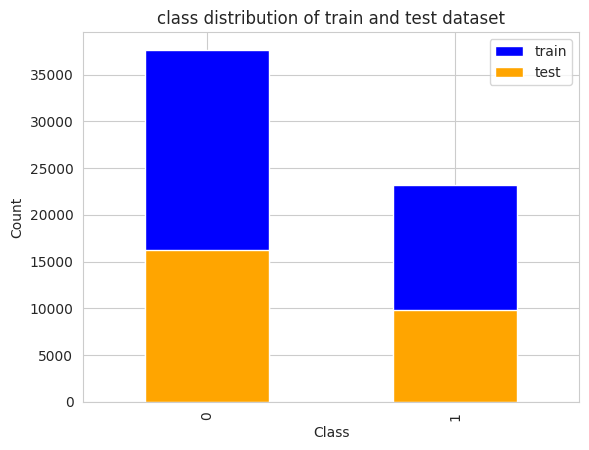

In [ ]:
# Plotting target label distribution
plt.figure()
plt.title("class distribution of train and test dataset")
train['attack'].value_counts().plot(kind="bar", color='b', label="train")
test['attack'].value_counts().plot(kind="bar", color='orange', label="test")
plt.xlabel("Class")
plt.ylabel("Count")
plt.legend()
plt.show()

#### Both train and test datasets are slightky imbalanced.
#### Percentage of points belongs to class 1 (attack) is  38% in both of them

# Datatype information of the Features

In [ ]:
# Check if any null value present in datasets
train.isnull().sum().sum(), test.isnull().sum().sum()  # No Null in train and test data is still raw

(0, 0)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60791 entries, 7567 to 2169
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   duration                60791 non-null  int64  
 1   protocoltype            60791 non-null  object 
 2   service                 60791 non-null  object 
 3   flag                    60791 non-null  object 
 4   srcbytes                60791 non-null  int64  
 5   dstbytes                60791 non-null  int64  
 6   land                    60791 non-null  int64  
 7   wrongfragment           60791 non-null  int64  
 8   urgent                  60791 non-null  int64  
 9   hot                     60791 non-null  int64  
 10  numfailedlogins         60791 non-null  int64  
 11  loggedin                60791 non-null  int64  
 12  numcompromised          60791 non-null  int64  
 13  rootshell               60791 non-null  int64  
 14  suattempted             60791 non-null  i

In [ ]:
# Categorical feature names
train.select_dtypes(exclude=np.number).columns

Index(['protocoltype', 'service', 'flag'], dtype='object')

In [ ]:
train.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack
7567,0,tcp,smtp,S0,0,0,0,0,0,0,...,0.49,0.01,0.01,0.01,0.99,0.58,0.00,0.00,17,1
58857,2,tcp,smtp,SF,840,336,0,0,0,0,...,0.56,0.02,0.00,0.01,0.00,0.00,0.00,0.00,21,0
78704,0,udp,domain_u,SF,43,129,0,0,0,0,...,0.91,0.01,0.91,0.01,0.00,0.00,0.05,0.00,20,0
83245,0,tcp,telnet,S1,1752,5177,0,0,0,0,...,0.15,0.03,0.01,0.00,0.01,0.09,0.01,0.09,16,0
76111,0,tcp,http,SF,280,824,0,0,0,0,...,1.00,0.00,0.01,0.02,0.00,0.00,0.00,0.00,21,0


In [ ]:
for i in train.columns:
  print(train[i].value_counts())

duration
0        56347
1          925
2          395
3          253
5          164
         ...  
5849         1
6813         1
14807        1
14173        1
14943        1
Name: count, Length: 1200, dtype: int64
protocoltype
tcp     53046
udp      7004
icmp      741
Name: count, dtype: int64
service
http        21986
private      8994
domain_u     5104
smtp         4012
ftp_data     3468
            ...  
shell          28
urh_i           7
red_i           4
tftp_u          2
tim_i           2
Name: count, Length: 65, dtype: int64
flag
SF      35454
S0      19471
REJ      4681
RSTO      804
S1        201
RSTR       73
S2         71
S3         30
OTH         5
SH          1
Name: count, dtype: int64
srcbytes
0        25032
44        1346
45        1176
46         728
43         715
         ...  
3277         1
1918         1
4107         1
11649        1
11836        1
Name: count, Length: 2617, dtype: int64
dstbytes
0        29307
105        845
44         296
330        295
331    

In [ ]:
# Categorical feature names
train.select_dtypes(include=np.number).columns

Index(['duration', 'srcbytes', 'dstbytes', 'land', 'wrongfragment', 'urgent',
       'hot', 'numfailedlogins', 'loggedin', 'numcompromised', 'rootshell',
       'suattempted', 'numroot', 'numfilecreations', 'numshells',
       'numaccessfiles', 'numoutboundcmds', 'ishostlogin', 'isguestlogin',
       'count', 'srvcount', 'serrorrate', 'srvserrorrate', 'rerrorrate',
       'srvrerrorrate', 'samesrvrate', 'diffsrvrate', 'srvdiffhostrate',
       'dsthostcount', 'dsthostsrvcount', 'dsthostsamesrvrate',
       'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'lastflag', 'attack'],
      dtype='object')

# Observations:

1) In this dataset there are mainly 2 types of data types present

* numerical
* categorical
2) Categorical columns: 'protocoltype', 'service', 'flag'

3) Target column: 'attack'

# Exploratory Data Analysis

Performing EDA on the dataset in this notebook.

Below is my plan:

* Correlation of the features and its heatmap
* Pairplot between highly correlated features.
* For all the categorial or columns with small number of unique values, countplot or barplot of those features.
* For any numerical features, plot pdf

In [ ]:
# Dividing the train data into attack and non-attack category
normal = train[train['attack']==0]
anomaly = train[train['attack']==1]


# Correlation
### Getting correlation values for all the features.

Plot heatmap of correaltion for better visualization

# Utility functions

In [ ]:
def multi_corr(col1, col2="attack", df=train):
    '''
    This function returns correlation between 2 given features.
    Also gives corr of the given features with "attack" after applying log1p to it.
    '''
    corr = df[[col1, col2]].corr().iloc[0,1]
    log_corr = df[col1].apply(np.log1p).corr(df[col2])

    print("Correlation : {}\nlog_Correlation: {}".format(corr, log_corr))

In [ ]:
def corr(col1, col2="attack", df=train):
    """
    This function returns correlation between 2 given features
    """
    return df[[col1, col2]].corr().iloc[0,1]

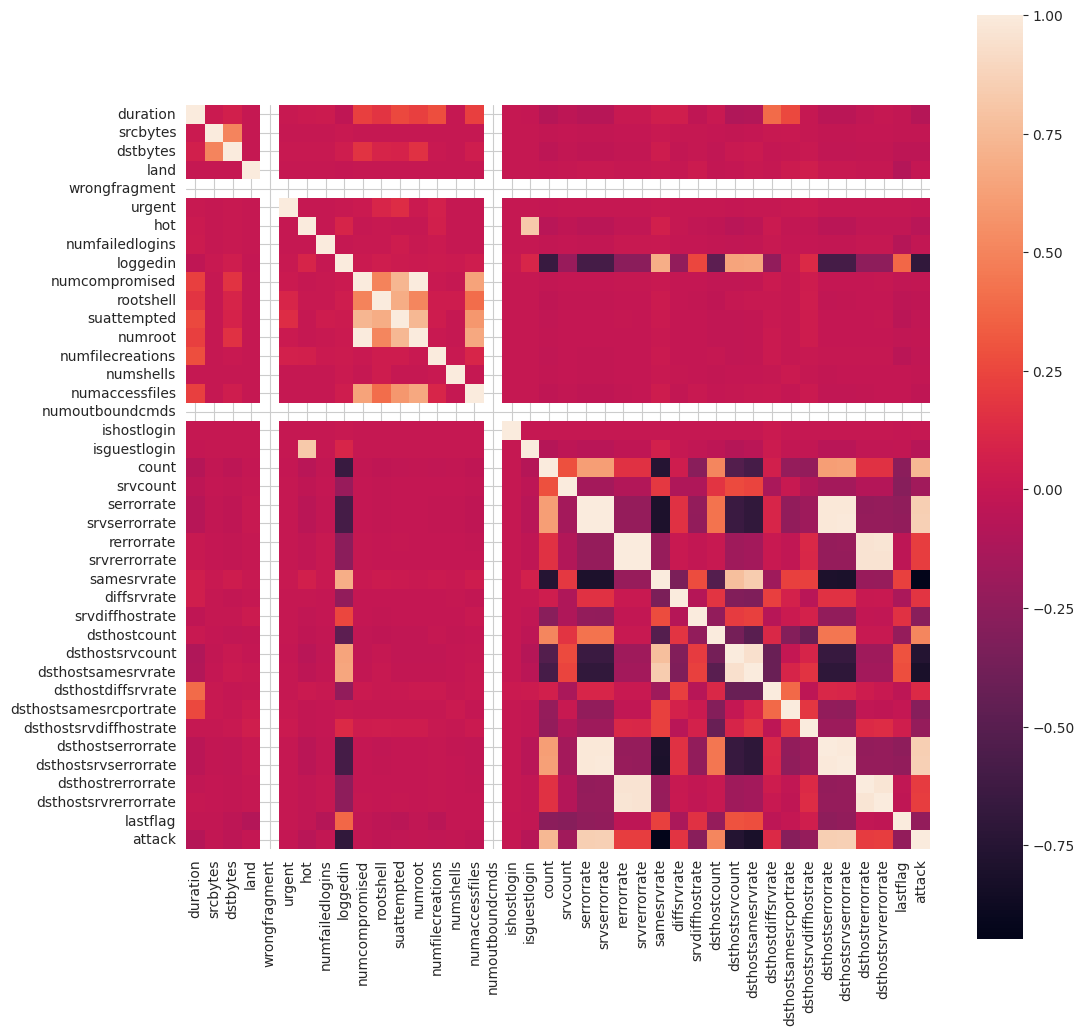

In [ ]:
method = "pearson"
# correlation matrix
corr_mat = train.select_dtypes(include=np.number).corr(method=method)

plt.figure(figsize=(12,12))
sns.heatmap(corr_mat, square=True)
plt.show()

In [ ]:
# Getting and printing high correlated features
limit = 0.9
corr_mat=train.select_dtypes(include=np.number).corr().abs()
columns = corr_mat.columns
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i, j] >= 0.9:
            print(f"{columns[i]:20s} {columns[j]:20s} {corr_mat.iloc[i, j]}")

numcompromised       numroot              0.9974591304735378
serrorrate           srvserrorrate        0.9961554389848029
serrorrate           dsthostserrorrate    0.9800429735724577
serrorrate           dsthostsrvserrorrate 0.983004669982225
srvserrorrate        dsthostserrorrate    0.9796471038502862
srvserrorrate        dsthostsrvserrorrate 0.9853134604904583
rerrorrate           srvrerrorrate        0.9946826868207168
rerrorrate           dsthostrerrorrate    0.9601457220271821
rerrorrate           dsthostsrvrerrorrate 0.9623844082590116
srvrerrorrate        dsthostrerrorrate    0.9565024527867061
srvrerrorrate        dsthostsrvrerrorrate 0.9615822815652463
samesrvrate          attack               0.9474188097098692
dsthostsrvcount      dsthostsamesrvrate   0.9408353316879224
dsthostserrorrate    dsthostsrvserrorrate 0.9881661171661389
dsthostrerrorrate    dsthostsrvrerrorrate 0.9633002400981875


### Most correlated features are:
* numcompromised , numroot
* serrorrate , srvserrorrate , dsthostserrorrate , dsthostsrvrerrorrate , rerrorrate
* samesrvrate , attack            
* dsthostsrvcount , dsthostsamesrvrate  
* dsthostserrorrate , dsthostsrvserrorrate



# Pairplots of highly correlated features

#### numcompromised and numroot
1. These features are having very high corr between them more 99%
2. All the features are following a straight line except for the starting points that means they are having incresing relation with each other.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


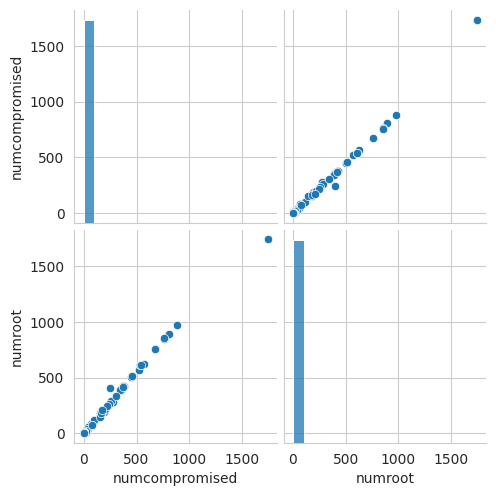

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(data=train, vars=["numcompromised","numroot"])
plt.show()

#### serrorrate , srvserrorrate and dsthostserrorrate
Plotting pairplots between them and checking for relationship

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

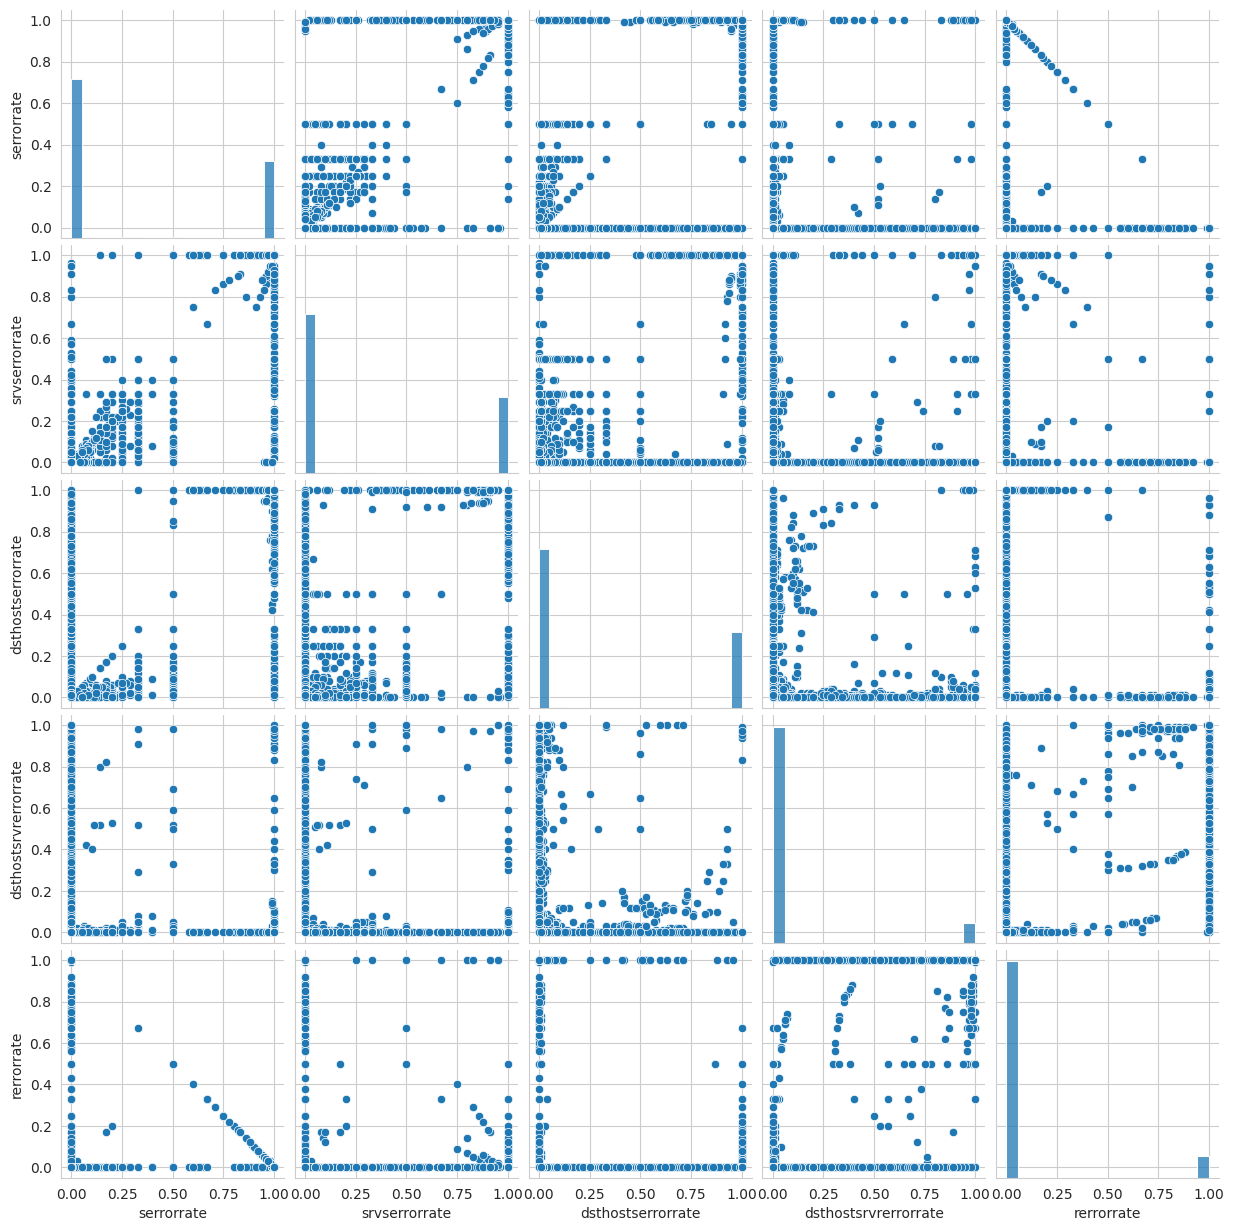

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(train, vars=["serrorrate", "srvserrorrate","dsthostserrorrate","dsthostsrvrerrorrate" , "rerrorrate"])
plt.show()

1. **All listed features are binary with zero and one as their values.**
2. **There is a dense cluster around (0, 0) of different features, indicating that many instances have low or no errors for both features , possibly representing normal network traffic.**
3. **A diagonal line from (0, 0) to (1, 1) suggests a correlation between the two features, where both error rates increase together for certain instances.**
4. **Visible gaps in the plot indicate possible discrete levels or thresholds in the error rates, suggesting errors might occur in bursts or specific intervals.**
5. **A concentration of points at (1, 1) shows instances where both features  are maximized, potentially signifying severe network anomalies or attacks.**

#### rerrorrate , srvrerrorrate , dsthostrerrorrate , dsthostsrvrerrorrate
Plotting pairplots between them to check for relationships between them

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

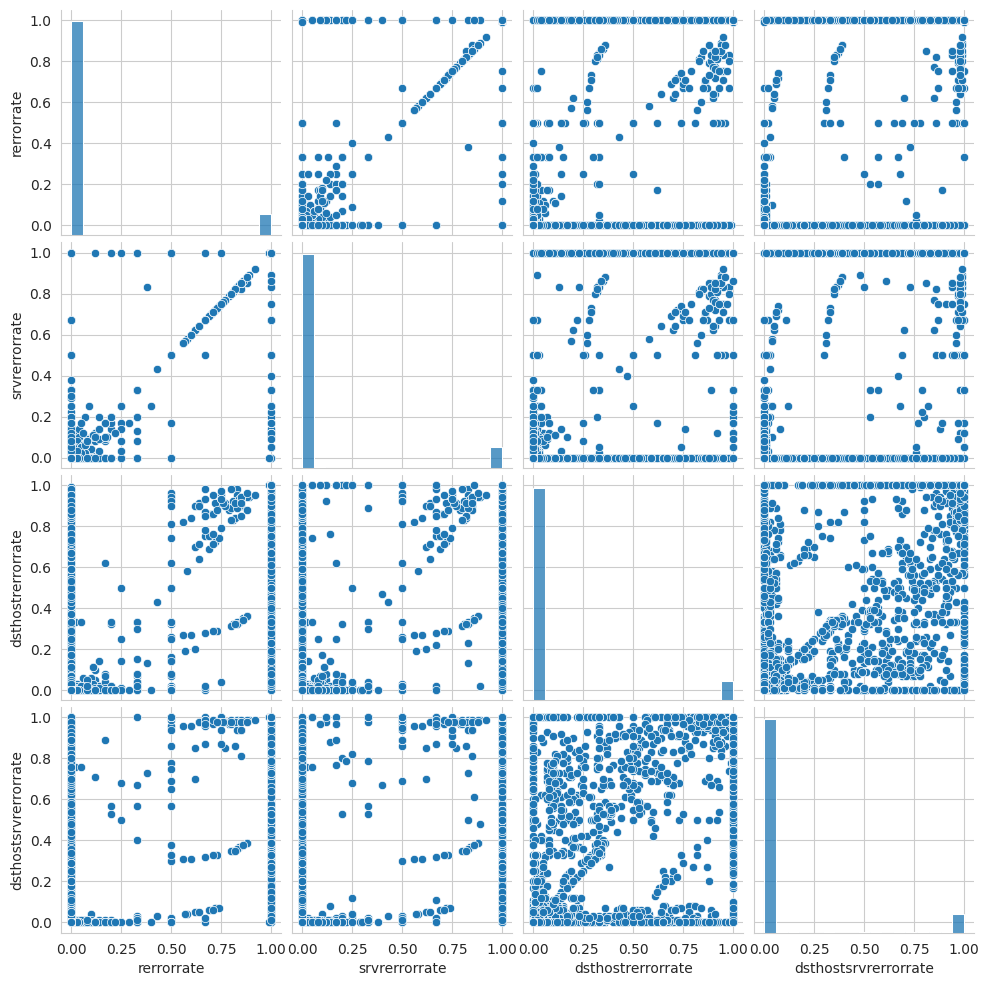

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(train, vars=["rerrorrate" , "srvrerrorrate" , "dsthostrerrorrate" , "dsthostsrvrerrorrate"])
plt.show()

1. As we can see that **most columns of these have most values as 0** and are not very useful as features and do not provide nesessary variance for the model to converge on.Hence these columns should be removed.
2. **Positive correlations** are observed between serrorrate, dsthostserrorrate, and dsthostsrvserrorrate, indicating that as source error rates increase, destination and server error rates tend to rise together.
3. **Strong correlation between dsthostserrorrate and dsthostsrvserrorrate** shows that errors at the destination host level often occur simultaneously at both host and server levels.

**dsthostsrvcount , dsthostsamesrvrate**
##### Finding relationship between the two features

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


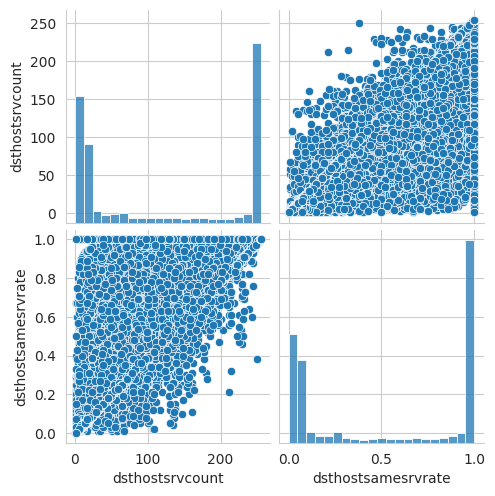

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(train,vars=["dsthostsrvcount" , "dsthostsamesrvrate"])
plt.show()

1. **Positive Correlation:** A clear positive trend exists between dsthostsrvcount and dsthostsame_srv_rate, indicating that as the number of destination host service counts increases, the rate of similar services also rises.
2. **Concentration at High Similarity:** Most data points show a high dsthostsame_srv_rate (around 1), suggesting that many connections share the same service, which could imply repetitive or highly similar traffic patterns.
3. **Diverse dsthost_srv_co Distribution:** The variable dsthost_srv_co shows no strong linear relationship with the other variables, reflecting more dispersed or domain-specific behavior in the dataset.
4. **Outliers in dsthostsrvcount:** While most values for dsthostsrvcount are clustered in the lower range, there are significant outliers, which could be indicative of abnormal traffic or unique cases worth further investigation.

### dsthostserrorrate , dsthostsrvserrorrate
Finding relationship between two features

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


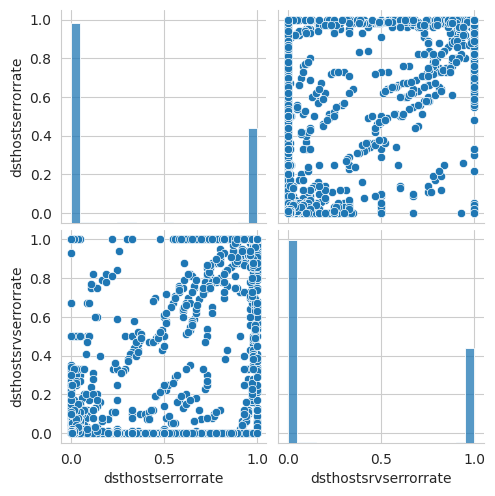

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(train,vars=["dsthostserrorrate" , "dsthostsrvserrorrate"])
plt.show()

can plot pdf functions tooo.


# Feature Engineering

## Removing highly correlated features

In [ ]:
corr_matrix = train.select_dtypes(include=np.number).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [ ]:
print(to_drop)

['numroot', 'srvserrorrate', 'srvrerrorrate', 'dsthostserrorrate', 'dsthostsrvserrorrate', 'dsthostrerrorrate', 'dsthostsrvrerrorrate']


In [ ]:
train.drop(columns=to_drop, inplace=True)

In [ ]:
# To use during test data transformation
saved_dict={}
saved_dict['to_drop'] = ['srcip', 'sport', 'dstip', 'dsport', 'attack_cat']

In [ ]:
saved_dict

{'to_drop': ['srcip', 'sport', 'dstip', 'dsport', 'attack_cat']}

In [ ]:
train.shape,test.shape

((60791, 36), (26054, 43))

In [ ]:
test.drop(columns=to_drop,inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60791 entries, 7567 to 2169
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   duration                60791 non-null  int64  
 1   protocoltype            60791 non-null  object 
 2   service                 60791 non-null  object 
 3   flag                    60791 non-null  object 
 4   srcbytes                60791 non-null  int64  
 5   dstbytes                60791 non-null  int64  
 6   land                    60791 non-null  int64  
 7   wrongfragment           60791 non-null  int64  
 8   urgent                  60791 non-null  int64  
 9   hot                     60791 non-null  int64  
 10  numfailedlogins         60791 non-null  int64  
 11  loggedin                60791 non-null  int64  
 12  numcompromised          60791 non-null  int64  
 13  rootshell               60791 non-null  int64  
 14  suattempted             60791 non-null  i

In [ ]:
train.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,lastflag,attack
count,60791.000000,6.079100e+04,6.079100e+04,60791.000000,60791.0,60791.000000,60791.000000,60791.000000,60791.000000,60791.000000,...,60791.000000,60791.000000,60791.000000,60791.000000,60791.000000,60791.000000,60791.000000,60791.000000,60791.000000,60791.000000
mean,104.887911,8.429981e+03,2.637793e+03,0.000049,0.0,0.000049,0.148805,0.000954,0.439572,0.260680,...,0.044954,0.078701,186.506522,123.164103,0.525183,0.050375,0.075954,0.016106,20.054942,0.380862
std,1047.075574,3.979770e+05,5.386055e+04,0.007025,0.0,0.009069,1.875470,0.041351,0.496339,12.704239,...,0.120997,0.222097,95.757713,112.688401,0.447357,0.103843,0.209012,0.054034,1.425524,0.485603
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,95.000000,12.000000,0.050000,0.000000,0.000000,0.000000,19.000000,0.000000
50%,0.000000,4.600000e+01,4.400000e+01,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,255.000000,76.000000,0.540000,0.030000,0.000000,0.000000,21.000000,0.000000
75%,0.000000,2.700000e+02,7.650000e+02,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.020000,0.010000,21.000000,1.000000
max,40504.000000,8.958152e+07,7.028652e+06,1.000000,0.0,2.000000,77.000000,4.000000,1.000000,1739.000000,...,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,21.000000,1.000000


In [ ]:
# Getting number of unique values of all the columns
# If the unique values are high that means it has continuous set of values
col_unique_values = train.nunique()

In [ ]:
# If the unique values are getter than some threshould than we will check its corr
col = col_unique_values[col_unique_values>200].index

In [ ]:
for column in col:
    print("{:-^30}".format(column))
    multi_corr(column)

-----------duration-----------
Correlation : -0.07856721273701701
log_Correlation: -0.16711676458006225
-----------srcbytes-----------
Correlation : -0.016613553655047252
log_Correlation: -0.8697637955704459
-----------dstbytes-----------
Correlation : -0.03841172485263221
log_Correlation: -0.7603604652643396
------------count-------------
Correlation : 0.7408410223174603
log_Correlation: 0.7826378900956715
-----------srvcount-----------
Correlation : -0.1698086292542203
log_Correlation: 0.05321339641275286
---------dsthostcount---------
Correlation : 0.5064927859876232
log_Correlation: 0.42233093153619133
-------dsthostsrvcount--------
Correlation : -0.7587188607859594
log_Correlation: -0.7381232713487307


In [ ]:
log1p_col=['duration','srcbytes','dstbytes','count','srvcount','dsthostcount','dsthostsrvcount']

In [ ]:
saved_dict['log1p_col'] = log1p_col

In [ ]:
def log1p_transform(col, df=train):
    '''
    Apply log1p on given column.
    Remove the original cola and keep log1p applied col
    '''
    new_col = col+'_log1p'
    df[new_col] = df[col].apply(np.log1p)
    df.drop(col, axis=1, inplace=True)

In [ ]:
for col in log1p_col:
    log1p_transform(col, df=train)

In [ ]:
train.shape

(60791, 36)

In [ ]:
train.columns

Index(['protocoltype', 'service', 'flag', 'land', 'wrongfragment', 'urgent',
       'hot', 'numfailedlogins', 'loggedin', 'numcompromised', 'rootshell',
       'suattempted', 'numfilecreations', 'numshells', 'numaccessfiles',
       'numoutboundcmds', 'ishostlogin', 'isguestlogin', 'serrorrate',
       'rerrorrate', 'samesrvrate', 'diffsrvrate', 'srvdiffhostrate',
       'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'lastflag', 'attack', 'duration_log1p',
       'srcbytes_log1p', 'dstbytes_log1p', 'count_log1p', 'srvcount_log1p',
       'dsthostcount_log1p', 'dsthostsrvcount_log1p'],
      dtype='object')

In [ ]:
# creating x and y set from the dataset
x_train, y_train = train.drop(columns=['attack']), train['attack']
x_test, y_test = test.drop(columns=['attack']), test['attack']

In [ ]:
print(x_train.shape, y_train.shape)
print()
print(x_test.shape, y_test.shape)

(60791, 35) (60791,)

(26054, 42) (26054,)


In [ ]:
import pickle

In [ ]:
# getting categorical and numerical columns in 2 diff lists
cat_col =x_train.select_dtypes(exclude=np.number).columns
num_col =x_train.select_dtypes(include=np.number).columns

In [ ]:
cat_col

Index(['protocoltype', 'service', 'flag'], dtype='object')

In [ ]:
saved_dict['cat_col'] = cat_col
saved_dict['num_col'] = num_col

# Standardizing
As we have seen that the range of few features in this dataset is very large. So we will keep everything within certain range by applying standardscaler. After this all the features will have mean 0 and std 1

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(x_train[num_col])

In [ ]:
x_train[num_col] = scaler.transform(x_train[num_col])

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(x_test[num_col])
x_test[num_col] = scaler.transform(x_test[num_col])

In [ ]:
x_train.head()

,protocoltype,service,flag,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsamesrcportrate,dsthostsrvdiffhostrate,lastflag,duration_log1p,srcbytes_log1p,dstbytes_log1p,count_log1p,srvcount_log1p,dsthostcount_log1p,dsthostsrvcount_log1p
7567,tcp,smtp,S0,-0.007025,0.0,-0.005442,-0.079343,-0.023073,-0.885635,-0.020519,...,-0.315551,-0.113007,-2.143049,-0.213074,-1.108947,-0.969458,-0.035068,0.787553,0.192475,0.614795
58857,tcp,smtp,SF,-0.007025,0.0,-0.005442,-0.079343,-0.023073,1.129133,-0.020519,...,-0.363396,-0.113007,0.662960,0.687465,1.184377,0.666690,-1.300432,-1.268188,0.435636,0.673627
78704,udp,domain_u,SF,-0.007025,0.0,-0.005442,-0.079343,-0.023073,-0.885635,-0.020519,...,3.990452,-0.113007,-0.038542,-0.213074,0.179679,0.398908,0.657091,2.393472,0.311114,0.890685
83245,tcp,telnet,S1,-0.007025,0.0,-0.005442,-0.079343,-0.023073,1.129133,-0.020519,...,-0.315551,-0.298078,-2.844551,-0.213074,1.434493,1.434738,-1.300432,-1.268188,0.120687,-0.461995
76111,tcp,http,SF,-0.007025,0.0,-0.005442,-0.079343,-0.023073,1.129133,-0.020519,...,-0.315551,0.072064,0.662960,-0.213074,0.811077,0.918378,-0.491031,0.086487,-0.101328,0.989193


In [ ]:
x_train.head()

,protocoltype,service,flag,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsamesrcportrate,dsthostsrvdiffhostrate,lastflag,duration_log1p,srcbytes_log1p,dstbytes_log1p,count_log1p,srvcount_log1p,dsthostcount_log1p,dsthostsrvcount_log1p
7567,tcp,smtp,S0,-0.007025,0.0,-0.005442,-0.079343,-0.023073,-0.885635,-0.020519,...,-0.315551,-0.113007,-2.143049,-0.213074,-1.108947,-0.969458,-0.035068,0.787553,0.192475,0.614795
58857,tcp,smtp,SF,-0.007025,0.0,-0.005442,-0.079343,-0.023073,1.129133,-0.020519,...,-0.363396,-0.113007,0.662960,0.687465,1.184377,0.666690,-1.300432,-1.268188,0.435636,0.673627
78704,udp,domain_u,SF,-0.007025,0.0,-0.005442,-0.079343,-0.023073,-0.885635,-0.020519,...,3.990452,-0.113007,-0.038542,-0.213074,0.179679,0.398908,0.657091,2.393472,0.311114,0.890685
83245,tcp,telnet,S1,-0.007025,0.0,-0.005442,-0.079343,-0.023073,1.129133,-0.020519,...,-0.315551,-0.298078,-2.844551,-0.213074,1.434493,1.434738,-1.300432,-1.268188,0.120687,-0.461995
76111,tcp,http,SF,-0.007025,0.0,-0.005442,-0.079343,-0.023073,1.129133,-0.020519,...,-0.315551,0.072064,0.662960,-0.213074,0.811077,0.918378,-0.491031,0.086487,-0.101328,0.989193


# Onehot Encoding
In our dataset we have few categorical columns with text data. But ML models can't process text data it can process numbers.

So we have to convert categorical columns to numerical columns in some way. We will use onehotencoder where we will assign 1 if the value is present for the row and rest of the columns will be 0.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Onehot Encoding
service_ = OneHotEncoder()
flag_ = OneHotEncoder()
ohe_service = service_.fit(x_train.service.values.reshape(-1,1))
ohe_flag = flag_.fit(x_train.flag.values.reshape(-1,1))

In [ ]:
# Onehot Encoding
servicetest_ = OneHotEncoder()
flagtest_ = OneHotEncoder()
ohe_servicetest = servicetest_.fit(x_test.service.values.reshape(-1,1))
ohe_flagtest = flagtest_.fit(x_test.flag.values.reshape(-1,1))

In [ ]:
x_train

,protocoltype,service,flag,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsamesrcportrate,dsthostsrvdiffhostrate,lastflag,duration_log1p,srcbytes_log1p,dstbytes_log1p,count_log1p,srvcount_log1p,dsthostcount_log1p,dsthostsrvcount_log1p
7567,tcp,smtp,S0,-0.007025,0.0,-0.005442,-0.079343,-0.023073,-0.885635,-0.020519,...,-0.315551,-0.113007,-2.143049,-0.213074,-1.108947,-0.969458,-0.035068,0.787553,0.192475,0.614795
58857,tcp,smtp,SF,-0.007025,0.0,-0.005442,-0.079343,-0.023073,1.129133,-0.020519,...,-0.363396,-0.113007,0.662960,0.687465,1.184377,0.666690,-1.300432,-1.268188,0.435636,0.673627
78704,udp,domain_u,SF,-0.007025,0.0,-0.005442,-0.079343,-0.023073,-0.885635,-0.020519,...,3.990452,-0.113007,-0.038542,-0.213074,0.179679,0.398908,0.657091,2.393472,0.311114,0.890685
83245,tcp,telnet,S1,-0.007025,0.0,-0.005442,-0.079343,-0.023073,1.129133,-0.020519,...,-0.315551,-0.298078,-2.844551,-0.213074,1.434493,1.434738,-1.300432,-1.268188,0.120687,-0.461995
76111,tcp,http,SF,-0.007025,0.0,-0.005442,-0.079343,-0.023073,1.129133,-0.020519,...,-0.315551,0.072064,0.662960,-0.213074,0.811077,0.918378,-0.491031,0.086487,-0.101328,0.989193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47519,tcp,private,S0,-0.007025,0.0,-0.005442,-0.079343,-0.023073,-0.885635,-0.020519,...,-0.363396,-0.298078,-1.441547,-0.213074,-1.108947,-0.969458,0.836133,-0.343478,0.501071,-0.673403
16765,udp,domain_u,SF,-0.007025,0.0,-0.005442,-0.079343,-0.023073,-0.885635,-0.020519,...,-0.315551,-0.298078,0.662960,-0.213074,0.187332,0.366876,-0.927423,-0.343478,-0.116350,0.476891
37316,tcp,http,SF,-0.007025,0.0,-0.005442,-0.079343,-0.023073,1.129133,-0.020519,...,-0.363396,-0.298078,0.662960,-0.213074,0.779347,1.726284,-1.082236,-0.926905,0.582381,0.989193
50497,tcp,http,SF,-0.007025,0.0,-0.005442,-0.079343,-0.023073,1.129133,-0.020519,...,-0.315551,0.072064,0.662960,-0.213074,0.855334,0.707030,-0.807341,-0.496940,-0.050719,0.989193


In [ ]:
for i in cat_col:
# Calculate the mean of the target for each category
    mean_target = train.groupby(i)['attack'].mean()

# Replace the categorical column with the target mean
    x_train[i] = x_train[i].map(mean_target)

In [ ]:
x_train

,protocoltype,service,flag,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsamesrcportrate,dsthostsrvdiffhostrate,lastflag,duration_log1p,srcbytes_log1p,dstbytes_log1p,count_log1p,srvcount_log1p,dsthostcount_log1p,dsthostsrvcount_log1p
7567,0.43647,0.034397,0.990242,-0.007025,0.0,-0.005442,-0.079343,-0.023073,-0.885635,-0.020519,...,-0.315551,-0.113007,-2.143049,-0.213074,-1.108947,-0.969458,-0.035068,0.787553,0.192475,0.614795
58857,0.43647,0.034397,0.000000,-0.007025,0.0,-0.005442,-0.079343,-0.023073,1.129133,-0.020519,...,-0.363396,-0.113007,0.662960,0.687465,1.184377,0.666690,-1.300432,-1.268188,0.435636,0.673627
78704,0.00000,0.000000,0.000000,-0.007025,0.0,-0.005442,-0.079343,-0.023073,-0.885635,-0.020519,...,3.990452,-0.113007,-0.038542,-0.213074,0.179679,0.398908,0.657091,2.393472,0.311114,0.890685
83245,0.43647,0.587302,0.000000,-0.007025,0.0,-0.005442,-0.079343,-0.023073,1.129133,-0.020519,...,-0.315551,-0.298078,-2.844551,-0.213074,1.434493,1.434738,-1.300432,-1.268188,0.120687,-0.461995
76111,0.43647,0.034840,0.000000,-0.007025,0.0,-0.005442,-0.079343,-0.023073,1.129133,-0.020519,...,-0.315551,0.072064,0.662960,-0.213074,0.811077,0.918378,-0.491031,0.086487,-0.101328,0.989193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47519,0.43647,0.941072,0.990242,-0.007025,0.0,-0.005442,-0.079343,-0.023073,-0.885635,-0.020519,...,-0.363396,-0.298078,-1.441547,-0.213074,-1.108947,-0.969458,0.836133,-0.343478,0.501071,-0.673403
16765,0.00000,0.000000,0.000000,-0.007025,0.0,-0.005442,-0.079343,-0.023073,-0.885635,-0.020519,...,-0.315551,-0.298078,0.662960,-0.213074,0.187332,0.366876,-0.927423,-0.343478,-0.116350,0.476891
37316,0.43647,0.034840,0.000000,-0.007025,0.0,-0.005442,-0.079343,-0.023073,1.129133,-0.020519,...,-0.363396,-0.298078,0.662960,-0.213074,0.779347,1.726284,-1.082236,-0.926905,0.582381,0.989193
50497,0.43647,0.034840,0.000000,-0.007025,0.0,-0.005442,-0.079343,-0.023073,1.129133,-0.020519,...,-0.315551,0.072064,0.662960,-0.213074,0.855334,0.707030,-0.807341,-0.496940,-0.050719,0.989193


In [ ]:
x_train['flag'].value_counts()

flag
0.000000    35835
0.990242    19471
0.680837     4681
0.851990      804
Name: count, dtype: int64

In [ ]:
# Saving all the files to disk to use later
pickle.dump((x_train, y_train), open('final_train.pkl', 'wb'))
pickle.dump((x_test, y_test), open('final_test.pkl', 'wb'))